<a href="https://colab.research.google.com/github/Chathurya99/Pose_Fit_FYP/blob/master/workout_squats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [ ]:
# Upload first your data before execute these code below
path_workout = "/content/squatNew.csv"; # change this
path_other = "/content/dancingNew.csv"; # change this
name_class = "squat" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,336.11853,134.501240,341.47052,131.799590,333.41388,130.977050,349.76947,140.29850,329.50555,138.48782,...,324.00560,240.06445,356.03436,313.36734,315.31927,316.35757,358.52686,370.99503,305.73870,376.41030
1,337.43057,121.411140,342.25195,117.841110,332.69626,116.906170,348.76220,125.00450,328.64087,125.02461,...,324.29382,242.23833,356.92044,325.29470,314.50630,327.78214,357.97370,394.75604,303.96234,400.85794
2,336.88358,125.701630,341.70953,122.193146,332.31683,121.943420,348.90228,127.74021,327.73483,128.34181,...,323.36725,246.45330,355.72540,324.71680,313.21313,325.74115,358.56600,388.15854,303.69140,394.59122
3,335.97113,123.223230,340.69952,118.913180,331.95680,118.473724,348.20258,124.23415,328.04047,124.14675,...,321.48938,245.43320,355.44055,326.85422,312.74554,327.48420,357.98743,393.01690,303.55750,397.74110
4,335.26294,123.691376,339.76940,118.635330,330.80430,119.273050,346.15198,123.05245,326.37988,126.22371,...,319.57623,245.10847,353.82047,325.29530,311.67792,325.27267,358.41388,390.91602,303.88525,394.26526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,327.91230,188.618330,332.90662,182.206730,323.76746,182.113900,339.93580,186.95644,318.15088,186.68192,...,311.40393,293.41860,372.43945,342.17870,284.64795,340.65738,367.51570,403.02585,287.70865,404.38583
4996,329.50240,214.313190,334.02087,208.058210,324.81107,207.792920,341.10345,212.36436,319.09167,212.83264,...,314.47170,306.48444,373.45197,340.06296,283.64020,339.60930,368.49268,401.70392,287.71800,400.42343
4997,329.94592,226.097340,334.52080,219.497010,325.07947,219.795560,341.27740,224.14830,318.79453,224.84125,...,314.90490,317.43204,374.27320,341.49374,285.06630,338.11096,368.73750,402.66403,287.30390,403.64563
4998,329.53442,236.142680,334.21550,229.939400,324.41647,229.972560,341.43652,233.77141,318.70020,234.34012,...,315.13055,322.86035,374.94586,341.75854,284.44217,339.99652,368.98450,401.95218,287.80295,404.12833


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,283.832428,3.261488,286.616516,2.132464,282.971100,2.140022,291.610474,0.405160,278.714417,-0.175094,...,279.287353,34.606720,297.084228,76.048515,263.216705,73.308006,291.952972,114.293518,250.683868,108.383843
1,291.134003,13.201362,296.236145,12.011653,289.152008,11.517987,298.787964,13.838686,283.981415,12.037097,...,278.720734,75.596214,297.091248,117.803284,260.679932,116.043617,295.309021,136.353622,247.596207,132.339142
2,292.700165,48.347771,296.407288,45.845058,289.456848,45.123451,300.045227,51.192543,285.603516,49.239761,...,278.360535,122.935440,295.779602,163.765427,261.616242,161.691376,295.156006,162.086548,261.474396,162.064529
3,293.455200,92.769463,297.173218,89.518478,290.270019,88.554550,300.732056,95.324837,286.138855,93.366402,...,278.394073,175.964203,303.519440,202.631729,269.606323,201.267471,311.508270,189.915741,270.006287,206.183655
4,294.013336,149.223969,297.651825,145.760773,291.141083,145.013199,301.388367,151.297852,286.986877,149.154602,...,279.398987,237.554321,311.016968,247.752091,279.216919,244.538666,311.418854,248.527161,261.204285,240.725357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,207.854904,189.067230,214.580566,182.875931,203.346573,183.571381,224.942383,186.673142,200.337204,188.293808,...,185.461365,319.757324,170.359879,432.782593,134.044922,376.923126,169.372528,424.383575,141.523590,403.512329
4996,207.101227,190.934265,213.798615,184.352432,202.715820,185.226608,223.704407,187.730972,199.664230,189.612076,...,185.684448,323.786316,173.312256,438.218109,135.790054,385.614654,174.983902,431.024414,143.490845,407.224365
4997,206.485367,194.311813,213.608475,186.829285,202.255920,187.510681,224.579941,190.718170,198.156403,192.830643,...,187.042831,324.533752,176.893036,438.149719,139.146652,394.048981,182.628754,424.380127,164.764862,409.367096
4998,206.518585,197.668884,213.182343,191.152054,202.091827,191.349030,223.996963,194.119995,198.338959,195.726913,...,186.937637,327.233063,182.853775,438.189484,144.491684,402.988525,186.858993,428.888733,166.053833,401.951324


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,336.11853,134.501240,341.47052,131.799590,333.41388,130.977050,349.76947,140.29850,329.50555,138.48782,...,240.06445,356.03436,313.36734,315.31927,316.35757,358.52686,370.99503,305.73870,376.41030,squat
1,337.43057,121.411140,342.25195,117.841110,332.69626,116.906170,348.76220,125.00450,328.64087,125.02461,...,242.23833,356.92044,325.29470,314.50630,327.78214,357.97370,394.75604,303.96234,400.85794,squat
2,336.88358,125.701630,341.70953,122.193146,332.31683,121.943420,348.90228,127.74021,327.73483,128.34181,...,246.45330,355.72540,324.71680,313.21313,325.74115,358.56600,388.15854,303.69140,394.59122,squat
3,335.97113,123.223230,340.69952,118.913180,331.95680,118.473724,348.20258,124.23415,328.04047,124.14675,...,245.43320,355.44055,326.85422,312.74554,327.48420,357.98743,393.01690,303.55750,397.74110,squat
4,335.26294,123.691376,339.76940,118.635330,330.80430,119.273050,346.15198,123.05245,326.37988,126.22371,...,245.10847,353.82047,325.29530,311.67792,325.27267,358.41388,390.91602,303.88525,394.26526,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,327.91230,188.618330,332.90662,182.206730,323.76746,182.113900,339.93580,186.95644,318.15088,186.68192,...,293.41860,372.43945,342.17870,284.64795,340.65738,367.51570,403.02585,287.70865,404.38583,squat
4996,329.50240,214.313190,334.02087,208.058210,324.81107,207.792920,341.10345,212.36436,319.09167,212.83264,...,306.48444,373.45197,340.06296,283.64020,339.60930,368.49268,401.70392,287.71800,400.42343,squat
4997,329.94592,226.097340,334.52080,219.497010,325.07947,219.795560,341.27740,224.14830,318.79453,224.84125,...,317.43204,374.27320,341.49374,285.06630,338.11096,368.73750,402.66403,287.30390,403.64563,squat
4998,329.53442,236.142680,334.21550,229.939400,324.41647,229.972560,341.43652,233.77141,318.70020,234.34012,...,322.86035,374.94586,341.75854,284.44217,339.99652,368.98450,401.95218,287.80295,404.12833,squat


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,283.832428,3.261488,286.616516,2.132464,282.971100,2.140022,291.610474,0.405160,278.714417,-0.175094,...,34.606720,297.084228,76.048515,263.216705,73.308006,291.952972,114.293518,250.683868,108.383843,other
1,291.134003,13.201362,296.236145,12.011653,289.152008,11.517987,298.787964,13.838686,283.981415,12.037097,...,75.596214,297.091248,117.803284,260.679932,116.043617,295.309021,136.353622,247.596207,132.339142,other
2,292.700165,48.347771,296.407288,45.845058,289.456848,45.123451,300.045227,51.192543,285.603516,49.239761,...,122.935440,295.779602,163.765427,261.616242,161.691376,295.156006,162.086548,261.474396,162.064529,other
3,293.455200,92.769463,297.173218,89.518478,290.270019,88.554550,300.732056,95.324837,286.138855,93.366402,...,175.964203,303.519440,202.631729,269.606323,201.267471,311.508270,189.915741,270.006287,206.183655,other
4,294.013336,149.223969,297.651825,145.760773,291.141083,145.013199,301.388367,151.297852,286.986877,149.154602,...,237.554321,311.016968,247.752091,279.216919,244.538666,311.418854,248.527161,261.204285,240.725357,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,207.854904,189.067230,214.580566,182.875931,203.346573,183.571381,224.942383,186.673142,200.337204,188.293808,...,319.757324,170.359879,432.782593,134.044922,376.923126,169.372528,424.383575,141.523590,403.512329,other
4996,207.101227,190.934265,213.798615,184.352432,202.715820,185.226608,223.704407,187.730972,199.664230,189.612076,...,323.786316,173.312256,438.218109,135.790054,385.614654,174.983902,431.024414,143.490845,407.224365,other
4997,206.485367,194.311813,213.608475,186.829285,202.255920,187.510681,224.579941,190.718170,198.156403,192.830643,...,324.533752,176.893036,438.149719,139.146652,394.048981,182.628754,424.380127,164.764862,409.367096,other
4998,206.518585,197.668884,213.182343,191.152054,202.091827,191.349030,223.996963,194.119995,198.338959,195.726913,...,327.233063,182.853775,438.189484,144.491684,402.988525,186.858993,428.888733,166.053833,401.951324,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,336.118530,134.501240,341.470520,131.799590,333.413880,130.977050,349.769470,140.298500,329.505550,138.487820,...,240.064450,356.034360,313.367340,315.319270,316.357570,358.526860,370.995030,305.738700,376.410300,squat
1,337.430570,121.411140,342.251950,117.841110,332.696260,116.906170,348.762200,125.004500,328.640870,125.024610,...,242.238330,356.920440,325.294700,314.506300,327.782140,357.973700,394.756040,303.962340,400.857940,squat
2,336.883580,125.701630,341.709530,122.193146,332.316830,121.943420,348.902280,127.740210,327.734830,128.341810,...,246.453300,355.725400,324.716800,313.213130,325.741150,358.566000,388.158540,303.691400,394.591220,squat
3,335.971130,123.223230,340.699520,118.913180,331.956800,118.473724,348.202580,124.234150,328.040470,124.146750,...,245.433200,355.440550,326.854220,312.745540,327.484200,357.987430,393.016900,303.557500,397.741100,squat
4,335.262940,123.691376,339.769400,118.635330,330.804300,119.273050,346.151980,123.052450,326.379880,126.223710,...,245.108470,353.820470,325.295300,311.677920,325.272670,358.413880,390.916020,303.885250,394.265260,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,207.854904,189.067230,214.580566,182.875931,203.346573,183.571381,224.942383,186.673142,200.337204,188.293808,...,319.757324,170.359879,432.782593,134.044922,376.923126,169.372528,424.383575,141.523590,403.512329,other
9996,207.101227,190.934265,213.798615,184.352432,202.715820,185.226608,223.704407,187.730972,199.664230,189.612076,...,323.786316,173.312256,438.218109,135.790054,385.614654,174.983902,431.024414,143.490845,407.224365,other
9997,206.485367,194.311813,213.608475,186.829285,202.255920,187.510681,224.579941,190.718170,198.156403,192.830643,...,324.533752,176.893036,438.149719,139.146652,394.048981,182.628754,424.380127,164.764862,409.367096,other
9998,206.518585,197.668884,213.182343,191.152054,202.091827,191.349030,223.996963,194.119995,198.338959,195.726913,...,327.233063,182.853775,438.189484,144.491684,402.988525,186.858993,428.888733,166.053833,401.951324,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,336.118530,134.501240,341.470520,131.799590,333.413880,130.977050,349.769470,140.298500,329.505550,138.487820,...,324.005600,240.064450,356.034360,313.367340,315.319270,316.357570,358.526860,370.995030,305.738700,376.410300
1,337.430570,121.411140,342.251950,117.841110,332.696260,116.906170,348.762200,125.004500,328.640870,125.024610,...,324.293820,242.238330,356.920440,325.294700,314.506300,327.782140,357.973700,394.756040,303.962340,400.857940
2,336.883580,125.701630,341.709530,122.193146,332.316830,121.943420,348.902280,127.740210,327.734830,128.341810,...,323.367250,246.453300,355.725400,324.716800,313.213130,325.741150,358.566000,388.158540,303.691400,394.591220
3,335.971130,123.223230,340.699520,118.913180,331.956800,118.473724,348.202580,124.234150,328.040470,124.146750,...,321.489380,245.433200,355.440550,326.854220,312.745540,327.484200,357.987430,393.016900,303.557500,397.741100
4,335.262940,123.691376,339.769400,118.635330,330.804300,119.273050,346.151980,123.052450,326.379880,126.223710,...,319.576230,245.108470,353.820470,325.295300,311.677920,325.272670,358.413880,390.916020,303.885250,394.265260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,207.854904,189.067230,214.580566,182.875931,203.346573,183.571381,224.942383,186.673142,200.337204,188.293808,...,185.461365,319.757324,170.359879,432.782593,134.044922,376.923126,169.372528,424.383575,141.523590,403.512329
9996,207.101227,190.934265,213.798615,184.352432,202.715820,185.226608,223.704407,187.730972,199.664230,189.612076,...,185.684448,323.786316,173.312256,438.218109,135.790054,385.614654,174.983902,431.024414,143.490845,407.224365
9997,206.485367,194.311813,213.608475,186.829285,202.255920,187.510681,224.579941,190.718170,198.156403,192.830643,...,187.042831,324.533752,176.893036,438.149719,139.146652,394.048981,182.628754,424.380127,164.764862,409.367096
9998,206.518585,197.668884,213.182343,191.152054,202.091827,191.349030,223.996963,194.119995,198.338959,195.726913,...,186.937637,327.233063,182.853775,438.189484,144.491684,402.988525,186.858993,428.888733,166.053833,401.951324


In [ ]:
y

,class
0,squat
1,squat
2,squat
3,squat
4,squat
...,...
9995,other
9996,other
9997,other
9998,other


In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.525185,0.373615,0.533548,0.366110,0.520959,0.363825,0.546515,0.389718,0.514852,0.384688,...,0.506259,0.666846,0.556304,0.870465,0.492686,0.878771,0.560198,1.030542,0.477717,1.045584
1,0.527235,0.337253,0.534769,0.327336,0.519838,0.324739,0.544941,0.347235,0.513501,0.347291,...,0.506709,0.672884,0.557688,0.903596,0.491416,0.910506,0.559334,1.096545,0.474941,1.113494
2,0.526381,0.349171,0.533921,0.339425,0.519245,0.338732,0.545160,0.354834,0.512086,0.356505,...,0.505261,0.684593,0.555821,0.901991,0.489396,0.904837,0.560259,1.078218,0.474518,1.096087
3,0.524955,0.342287,0.532343,0.330314,0.518682,0.329094,0.544067,0.345095,0.512563,0.344852,...,0.502327,0.681759,0.555376,0.907928,0.488665,0.909678,0.559355,1.091714,0.474309,1.104836
4,0.523848,0.343587,0.530890,0.329543,0.516882,0.331314,0.540862,0.341812,0.509969,0.350621,...,0.499338,0.680857,0.552844,0.903598,0.486997,0.903535,0.560022,1.085878,0.474821,1.095181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.324773,0.525187,0.335282,0.507989,0.317729,0.509921,0.351472,0.518537,0.313027,0.523038,...,0.289783,0.888215,0.266187,1.202174,0.209445,1.047009,0.264645,1.178843,0.221131,1.120868
9996,0.323596,0.530373,0.334060,0.512090,0.316743,0.514518,0.349538,0.521475,0.311975,0.526700,...,0.290132,0.899406,0.270800,1.217273,0.212172,1.071152,0.273412,1.197290,0.224204,1.131179
9997,0.322633,0.539755,0.333763,0.518970,0.316025,0.520863,0.350906,0.529773,0.309619,0.535641,...,0.292254,0.901483,0.276395,1.217083,0.217417,1.094581,0.285357,1.178834,0.257445,1.137131
9998,0.322685,0.549080,0.333097,0.530978,0.315768,0.531525,0.349995,0.539222,0.309905,0.543686,...,0.292090,0.908981,0.285709,1.217193,0.225768,1.119413,0.291967,1.191358,0.259459,1.116531


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

### Split Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 9000
The number of test data X is: 1000
The number of train data y is : 9000
The number of test daya y is : 1000
The total dataset is : 10000


## Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,882 (19.07 KB)

 Trainable params: 4,882 (19.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5402 - loss: 0.6954 - val_accuracy: 0.7840 - val_loss: 0.5599
Epoch 2/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7248 - loss: 0.5659 - val_accuracy: 0.8250 - val_loss: 0.4060
Epoch 3/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8149 - loss: 0.4281 - val_accuracy: 0.9080 - val_loss: 0.2596
Epoch 4/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8966 - loss: 0.2989 - val_accuracy: 0.9530 - val_loss: 0.1698
Epoch 5/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9241 - loss: 0.2311 - val_accuracy: 0.9610 - val_loss: 0.1104
Epoch 6/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9301 - loss: 0.2033 - val_accuracy: 0.9800 - val_loss: 0.0768
Epoch 7/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9428 - loss: 0.1785 - val_accuracy: 0.9590 - val_loss: 0.0978
Epoch 8/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9411 - loss: 0.1757 - val_accu

## Visualization Acc & Loss

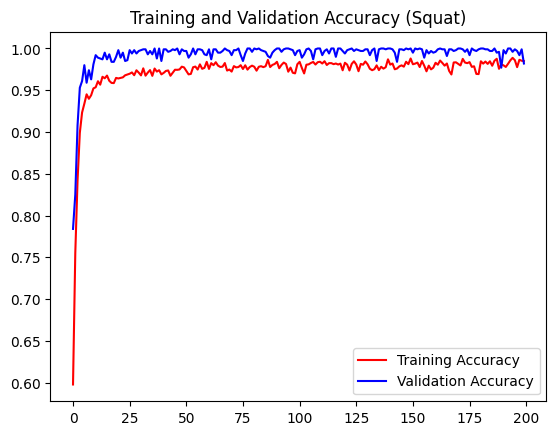

<Figure size 640x480 with 0 Axes>

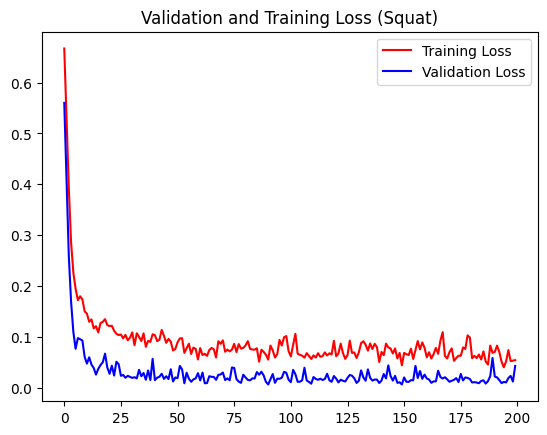

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Squat)')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss (Squat)')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.04304521530866623
Test accuracy: 0.9819999933242798


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
3484,0.515422,0.501114,0.524006,0.481199,0.508021,0.480081,0.537248,0.478239,0.501452,0.478362,...,0.491154,0.779752,0.585202,0.923977,0.440053,0.926606,0.58019,1.11231,0.44996,1.112803


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : squat


In [ ]:
df_data['class'].unique()

array(['squat', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
squat


## Export Model

In [ ]:
# Download this file for backup
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2025-08-28 05:41:17.962606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756359678.007110   68811 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756359678.015893   68811 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756359678.035911   68811 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756359678.035965   68811 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756359678.035970   68811 computation_placer.cc:177] computation placer alr

In [ ]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/model.json (deflated 82%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)


Don't forget to download tfjs model (check relatable folder)